# Import section

In [1]:
from __future__ import print_function
import numpy
import scipy.fftpack
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Constants

In [2]:
WAVETABLE_SIZE = 256
N = WAVETABLE_SIZE
DUREE = 1.0
T = DUREE / N
SR = int(N / DUREE)
axeX = numpy.linspace(0.0, DUREE, N)
axeXfft = numpy.fft.fftfreq(N, d=T)

# Helper functions

In [3]:
def plotTimeAndFrequency(timeDomainFct):
    plt.figure(figsize=(15, 5))
    freq = numpy.fft.fftfreq(N)
    freqData = scipy.fftpack.fft(timeDomainFct)
    plt.subplot(1, 2, 1)
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.plot(axeX, timeDomainFct)    

    plt.subplot(1, 2, 2)
    plt.plot(axeXfft[1:N//2], 2.0/N * numpy.abs(freqData[1:N//2]))
    plt.xlabel("Frequency(Hz)")
    plt.show()

In [4]:
def plotTime(timeDomainFct):
    plt.figure(figsize=(15, 5))
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.plot(axeX, timeDomainFct)
    plt.show()

In [5]:
def plotTimeWithSin(timeDomainFct, freq):
    plt.figure(figsize=(15, 5))
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.plot(axeX, timeDomainFct)
    plt.plot(axeX, sine(freq))
    plt.show()

In [6]:
def plotNewSignalAndTotalSignalWithSin(freq, newSignal, totalSignal):
    plt.figure(figsize=(15, 5))
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.subplot(1, 2, 1)
    plt.plot(axeX, newSignal)
    plt.subplot(1, 2, 2)
    plt.plot(axeX, totalSignal)
    plt.plot(axeX, sine(freq))
    plt.show()

In [7]:
def scale(x):
    maximum = numpy.abs(x).max()
    return numpy.round(x / maximum * 32766.0)

In [8]:
def playAudioAtX100Hz(audio):
    audiolong = []
    for i in range(100):
        for sample in audio:
            audiolong.append(sample)
    return ipd.Audio(audiolong, rate = SR*100)

In [21]:
def plotAndPlay(audio):
    plotTimeAndFrequency(audio)
    return playAudioAtX100Hz(audio)

# Basic functions algorithms

## Sine wave

In [9]:
def sine(frequency):
    t = numpy.arange(0, WAVETABLE_SIZE) / float(WAVETABLE_SIZE - 1)
    if frequency >= WAVETABLE_SIZE / 2:
        return t * 0
    t[-1] = t[0]
    x = numpy.sin(2 * numpy.pi * t * frequency)
    return x

In [25]:
def plotAndPlaySin(freq):
    return plotAndPlay(sine(freq))

In [28]:
interact(plotAndPlaySin, freq=10.0)

interactive(children=(FloatSlider(value=10.0, description='freq', max=30.0, min=-10.0), Output()), _dom_classe…

<function __main__.plotAndPlaySin(freq)>

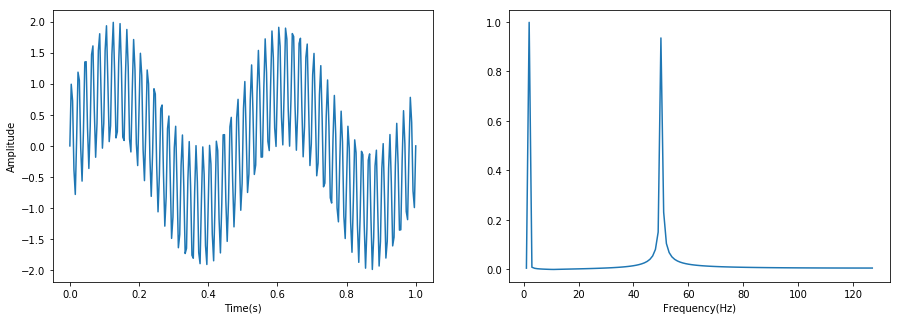

In [11]:
plotTimeAndFrequency(sine(2)+sine(50))
playAudioAtX100Hz(sine(2)+sine(50))

## Comb function (???)

In [12]:
def comb(n):
    x = 0
    for i in range(n):
        x += sine(i + 1)
    return x

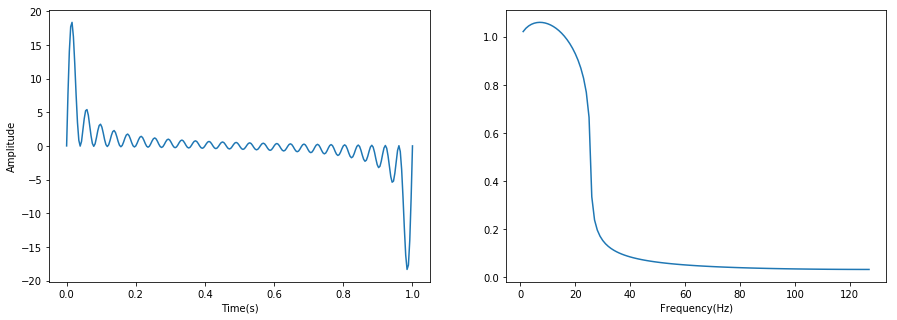

In [13]:
plotTimeAndFrequency(comb(25))
playAudioAtX100Hz(comb(25))

In [14]:
def tri(n, f=1):
    x = 0
    for i in range(n):
        newsine = sine((2 * i + 1) * f) / (2 * i + 1) ** 2.0
        x += newsine
    return x

In [15]:
def triVisual(n, f=1):
    x = 0
    for i in range(n):
        newsine = sine((2 * i + 1) * f) / (2 * i + 1) ** 2.0
        x += newsine
        plotNewSignalAndTotalSignalWithSin(f, newsine, x)

In [16]:
def triVisualStacked(n, f=1):
    plt.figure(figsize=(15, 5))
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    
    x = 0
    for i in range(n):
        newsine = sine((2 * i + 1) * f) / (2 * i + 1) ** 2.0
        x += newsine
        plt.plot(axeX, x)
    plt.show()

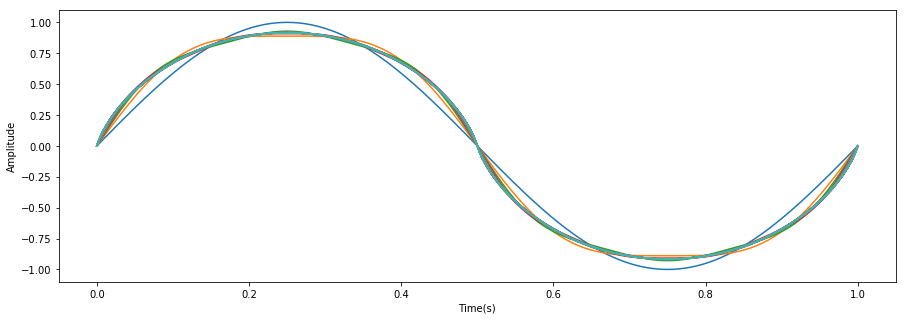

In [17]:
triVisualStacked(50,1)

In [18]:
def tri_stack_bright(n):
    x = 0
    for i in range(n):
        x += tri(15 + 5 * n, i + n / 3)
    return x


def tri_stack(n):
    x = 0
    for i in range(n):
        x += tri(5 + 7 * n, i + 1) / ((i + 1) ** 0.5)
    return x